In [1]:
%pylab inline
import numpy as np
from scipy.signal import gaussian
from scipy.ndimage import filters
import pymech.neksuite as nek
from scipy.interpolate import griddata

Populating the interactive namespace from numpy and matplotlib


In [2]:
base_dir = '../Re_17500/Re_17500_switch'

In [3]:
fc = np.load(base_dir+'/forceCoeffs.npy')
time = fc[100:,0]
Cd = fc[100:,1]
Cl = fc[100:,2]

(0.0, 1020.0)

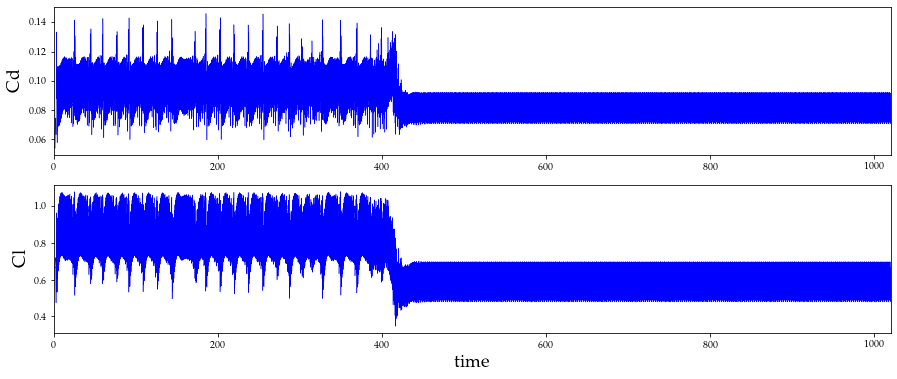

In [4]:
figure(figsize = (15,6))

subplot(2,1,1)
plot(time, Cd, 'b', linewidth=0.5)
xlim([time[0], time[-1]])
xlim([0,1020])
ylabel('Cd', fontsize = 18)

subplot(2,1,2)
plot(time, Cl, 'b', linewidth=0.5)
xlim([time[0], time[-1]])
ylabel('Cl', fontsize = 18)
xlabel('time', fontsize = 18)
xlim([0,1020])

In [5]:
Cl_time = fc[10000:,0]; dt = 0.001
Cd = fc[10000:,1]
Cl = fc[10000:,2]

In [6]:
max_ind = np.max(np.where(Cl_time < 380))
min_ind = np.min(np.where(Cl_time > 450))

F_Cd = np.fft.fft(Cd[:max_ind] - np.mean(Cd[:max_ind]))
freqs = np.fft.fftfreq(max_ind, d=dt)
f_peak = freqs[np.argmax(np.abs(F_Cd))]

width_smoother = int(3/(f_peak*dt))
scale_smoother = int(0.5/(f_peak*dt))
smoother_kern = gaussian(width_smoother, scale_smoother)
smoother_kern = smoother_kern/np.sum(smoother_kern)

q = filters.convolve1d(Cd, smoother_kern)
print('Mean / std q:', np.mean(q), np.std(q))
q = (q - np.mean(q))/np.std(q)

print('Dominant frequency/period:', f_peak, f_peak**-1)

Mean / std q: 0.08853526169661136 0.006895601169665759
Dominant frequency/period: 1.4405444339038753 0.6941819887429644


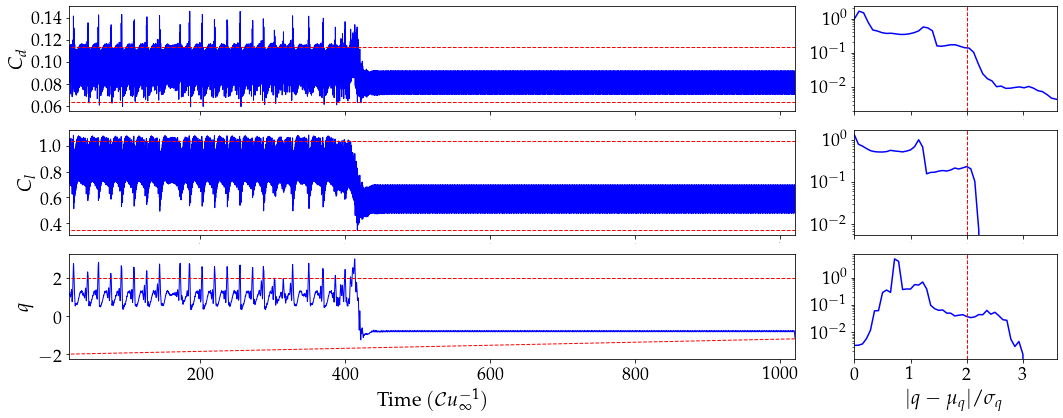

In [7]:
figure(figsize=(15,6))
label_fs = 18

start = 10000
end = -1

subplot2grid((3,4), (0,0), colspan=3,rowspan=1)
plot(Cl_time, Cd, 'b', linewidth=1)

nsigma = 2
# plot([0,250], [np.mean(Cd),np.mean(Cd)], 'r--')
plot([0,5000], [np.mean(Cd) + nsigma*np.std(Cd),np.mean(Cd) + nsigma*np.std(Cd)], 'r--', linewidth = 1)
plot([0,5000], [np.mean(Cd) - nsigma*np.std(Cd),np.mean(Cd) - nsigma*np.std(Cd)], 'r--', linewidth = 1)

xlim([Cl_time[start], Cl_time[end]])
ylabel(r'$C_d$',fontsize = label_fs+2)
xticks(fontsize = label_fs)
xticks(fontsize = 0)
yticks(fontsize = label_fs)

####################################################################################################

subplot2grid((3,4), (1,0), colspan=3,rowspan=1)
plot(Cl_time, Cl, 'b', linewidth=1)

# plot([0,250], [np.mean(Cl),np.mean(Cl)], 'r--')
plot([0,5000], [np.mean(Cl) + nsigma*np.std(Cl),np.mean(Cl) + nsigma*np.std(Cl)], 'r--', linewidth = 1)
plot([0,5000], [np.mean(Cl) - nsigma*np.std(Cl),np.mean(Cl) - nsigma*np.std(Cl)], 'r--', linewidth = 1)

xlim([Cl_time[start], Cl_time[end]])
xticks(fontsize = label_fs)
xticks(fontsize = 0)
yticks(fontsize = label_fs)
ylabel(r'$C_l$',fontsize = label_fs+2)

####################################################################################################

subplot2grid((3,4), (2,0), colspan=3,rowspan=1)
plot(Cl_time, q, 'b', linewidth=1)
plot([0,5000], [np.mean(q) + nsigma*np.std(q),np.mean(q) + nsigma*np.std(q)], 'r--', linewidth = 1)
plot([0,5000], [np.mean(q) - nsigma*np.std(q),np.mean(q) + nsigma*np.std(q)], 'r--', linewidth = 1)

# ylim([0.09,0.175])
xlim([Cl_time[start], Cl_time[end]])
xticks(fontsize = label_fs)
yticks(fontsize = label_fs)
ylabel(r'$q$',fontsize = label_fs+2)
xlabel(r'Time $(\mathcal{C} u_\infty^{-1})$',fontsize = label_fs+2)

####################################################################################################

subplot2grid((3,4), (0,3), colspan=1,rowspan=1)
Cd_hist = np.histogram(np.abs(Cd-np.mean(Cd))/np.std(Cd), density = True, bins=np.linspace(0.0,4,50))
plot(Cd_hist[1][:-1], Cd_hist[0], 'b')
xlim([0,3.6])
xticks(fontsize = label_fs)
yticks(fontsize = label_fs)
xticks(fontsize = 0)
yscale('log')
#xlabel(r'$|C_d - \mu_{C_d}|/ \sigma_{C_d}$',fontsize = label_fs+2)
axvline(2, color = 'r', linestyle = '--', linewidth = 1)

subplot2grid((3,4), (1,3), colspan=1,rowspan=1)
# Cl_hist = hist(np.abs(Cl-np.mean(Cl))/np.std(Cl), density = True, 
#                bins=np.linspace(0.0,3.5,50), 
#                color = "b", ec="k")
Cl_hist = np.histogram(np.abs(Cl-np.mean(Cl))/np.std(Cl), density = True, bins=np.linspace(0.0,3.5,50))
plot(Cl_hist[1][:-1], Cl_hist[0], 'b')
xlim([0,3.6])
xticks(fontsize = label_fs)
yticks(fontsize = label_fs)
xticks(fontsize = 0)
yscale('log')
#xlabel(r'$|C_l - \mu_{C_l}|/ \sigma_{C_l}$',fontsize = label_fs+2)
axvline(2, color = 'r', linestyle = '--', linewidth = 1)

subplot2grid((3,4), (2,3), colspan=1,rowspan=1)
CdCl_hist = np.histogram(np.abs(q-np.mean(q))/np.std(q), density = True, bins=np.linspace(0.0,3.5,50))
plot(CdCl_hist[1][:-1], CdCl_hist[0], 'b')
xlim([0,3.6])
xticks(fontsize = label_fs)
yticks(fontsize = label_fs)
yscale('log')
xlabel(r'$|q - \mu_{q}|/ \sigma_{q}$',fontsize = label_fs+2)
axvline(2, color = 'r', linestyle = '--', linewidth = 1)

tight_layout()

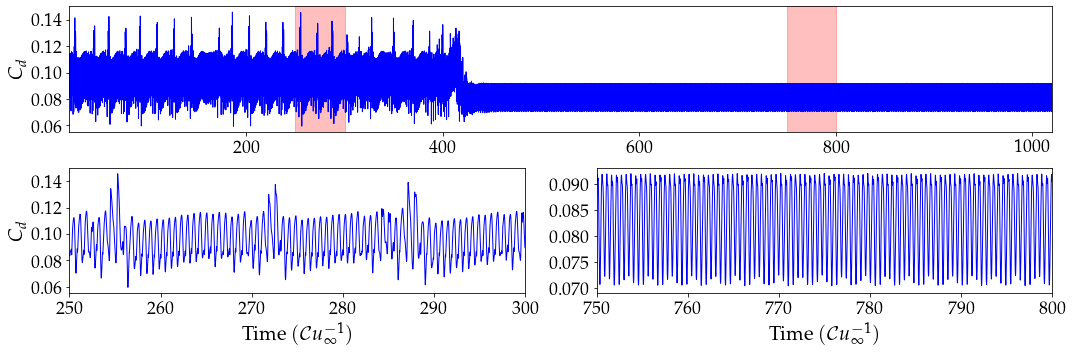

In [34]:
figure(figsize=(15,5))
label_fs = 18

start = 10000
end = -1

subplot2grid((2,2), (0,0), colspan=2,rowspan=1)
axvspan(250,300, alpha=0.25, color='red')
axvspan(750,800, alpha=0.25, color='red')
plot(Cl_time, Cd, 'b', linewidth=1)
# axvline(250, color='r', linestyle='--')
# axvline(300, color='r', linestyle='--')
# axvline(800, color='r', linestyle='--')
# axvline(750, color='r', linestyle='--')
xlim([Cl_time[start], Cl_time[end]])
ylabel(r'$C_d$',fontsize = label_fs+2)
xticks(fontsize = label_fs)
yticks(fontsize = label_fs)

subplot2grid((2,2), (1,0), colspan=1,rowspan=2)
plot(Cl_time, Cd, 'b', linewidth=1)
xlim([250,300])
xticks(fontsize = label_fs)
yticks(fontsize = label_fs)
xlabel(r'Time $(\mathcal{C} u_\infty^{-1})$',fontsize = label_fs+2)
ylabel(r'$C_d$',fontsize = label_fs+2)

subplot2grid((2,2), (1,1), colspan=1,rowspan=2)
plot(Cl_time[min_ind:], Cd[min_ind:], 'b', linewidth=1)
xlim([750,800])
xticks(fontsize = label_fs)
yticks(fontsize = label_fs)
xlabel(r'Time $(\mathcal{C} u_\infty^{-1})$',fontsize = label_fs+2)
# ylabel(r'$C_d$',fontsize = label_fs+2)

tight_layout()

In [9]:
def get_wing_boundary(alpha=5, n_points=50):
    
    # Parameters for naca 4412 airfoil
    m = 0.04
    p = 0.4
    t = 0.12
    c = 1
    x_nose = -0.25
    
    X = []
    Y = []
    
    for j in range(n_points):

        x = j/(n_points-1)

        # Airfoil thickness
        yt = 5*t*(0.2969*np.sqrt(x)-0.126*x-0.3516*x**2+0.2843*x**3-0.1036*x**4)

        # Center coord height
        if x < p:
            yc = m/p**2*(2*p*(x/c)-(x/c)**2)
            dyc = 2*m/(1-p)**2*(p/c-x/c**2)
        else:
            yc = m/(1-p)**2*(1-2*p+2*p*(x/c)-(x/c)**2)
            dyc = 2*m/(1-p)**2*(p/c-x/c**2)

        theta = np.arctan(dyc)
        xu = x - yt*np.sin(theta) + x_nose
        yu = yc + yt*np.cos(theta)

        xj = np.round(xu*np.cos(-alpha*np.pi/180) + yu*np.sin(alpha*np.pi/180), 5)
        yj = np.round(-xu*np.sin(alpha*np.pi/180) + yu*np.cos(alpha*np.pi/180), 5)

        X.append(xj)
        Y.append(yj)

    for j in range(n_points):

        x = 1-(j+1)/n_points # Now going backwards

        # Airfoil thickness
        yt = 5*t*(0.2969*np.sqrt(x)-0.126*x-0.3516*x**2+0.2843*x**3-0.1036*x**4)

        # Center coord height
        if x < p:
            yc = m/p**2*(2*p*(x/c)-(x/c)**2)
            dyc = 2*m/(1-p)**2*(p/c-x/c**2)
        else:
            yc = m/(1-p)**2*(1-2*p+2*p*(x/c)-(x/c)**2)
            dyc = 2*m/(1-p)**2*(p/c-x/c**2)

        theta = np.arctan(dyc)
        xb = x + yt*np.sin(theta) + x_nose
        yb = yc - yt*np.cos(theta)

        xj = np.round(xb*np.cos(-alpha*np.pi/180) + yb*np.sin(alpha*np.pi/180), 5)
        yj = np.round(-xb*np.sin(alpha*np.pi/180) + yb*np.cos(alpha*np.pi/180), 5)

        X.append(xj)
        Y.append(yj)
    
    return X,Y

def interp(field, Cx, Cy, XX, YY, method='linear', mask=None):
    """
    field - 1D array of cell values
    Cx, Cy - cell x-y values
    X, Y - meshgrid x-y values
    """
    ngrid = len(XX.flatten())
    grid_field = np.squeeze(np.reshape(griddata((Cx, Cy), field, (XX, YY), method=method), (ngrid, 1)))
    grid_field = grid_field.reshape(XX.shape)
    
    if mask is not None:
        for m in mask: grid_field[m[1],m[0]] = 0
        
    return grid_field

def load_file(file, return_xy=True):
    """
    Load velocity, pressure, and coorinates field from the file
    """

    field = nek.readnek(file)
    
    t = field.time
    nel = len(field.elem) # Number of spectral elements
    nGLL = field.elem[0].vel.shape[3] # Order of the spectral mesh
    n = nel*nGLL**2
    
    Cx = np.array([field.elem[i].pos[0, 0, j, k]
                   for i in range(nel) for j in range(nGLL) for k in range(nGLL)])
    Cy = np.array([field.elem[i].pos[1, 0, j, k]
                   for i in range(nel) for j in range(nGLL) for k in range(nGLL)])

    u = np.array([field.elem[i].vel[0, 0, j, k]
               for i in range(nel) for j in range(nGLL) for k in range(nGLL)])
    v = np.array([field.elem[i].vel[1, 0, j, k]
               for i in range(nel) for j in range(nGLL) for k in range(nGLL)])
    p = np.array([field.elem[i].pres[0, 0, j, k]
            for i in range(nel) for j in range(nGLL) for k in range(nGLL)])
    vort = np.array([field.elem[i].temp[0, 0, j, k]
            for i in range(nel) for j in range(nGLL) for k in range(nGLL)])
    
    if return_xy: return t,Cx,Cy,u,v,p,vort
    else: return t,u,v,p
    
def get_snapshot(num):
    
    snapshot_file = '../Re_17500/Re_17500_switch/outfiles/airfoil0.f{0:05d}'.format(num)
    t,Cx,Cy,u,v,p,vort = load_file(snapshot_file)

    return t,Cx,Cy,u,v,p,vort

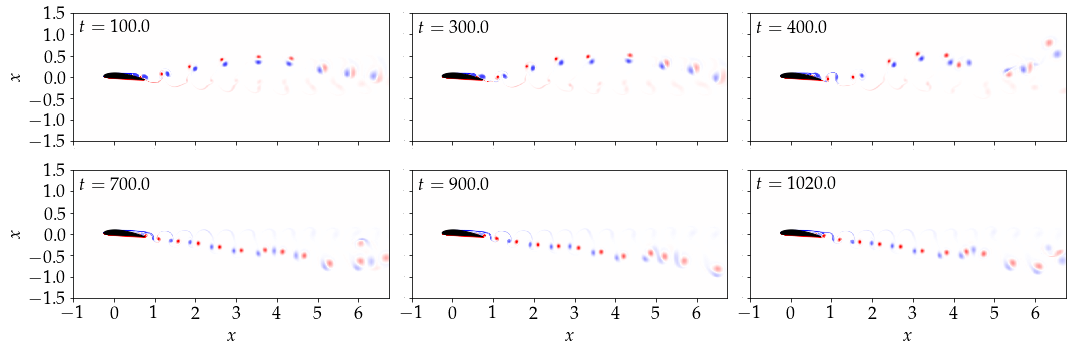

In [49]:
figure(figsize = (15,5))

wing_boundary_x, wing_boundary_y = get_wing_boundary(n_points=200)
nx = 800
ny = 400

scale = 1
x = np.linspace(-1/scale,6.75/scale,nx)
y = np.linspace(-1.5/scale,1.5/scale,ny)
XX, YY = np.meshgrid(x, y)

plot_nums = [2,4,5,8,10,12]

for j in range(6):
    
    if j < 3:
        row = 0
        col = j
    else:
        row = 1
        col = j-3
    
    ax = subplot2grid((2,3),(row, col), rowspan=1,colspan=1)
    t,Cx,Cy,u,v,p,W = get_snapshot(plot_nums[j])
    u_grid = interp(W, Cx, Cy, XX, YY, method='linear').reshape(ny,nx)
    pcolor(XX,YY,u_grid, cmap='bwr', vmin=-50,vmax=50, shading='auto')
    fill(wing_boundary_x, wing_boundary_y, c='k')
    xlim([np.min(x),np.max(x)])
    ylim([np.min(y),np.max(y)])
    # ax.set_aspect('equal')
    xticks(fontsize = 0)
    yticks(fontsize = label_fs)
    text(-0.85,1.05,r'$t='+str(np.round(t,2))+'$',fontsize = label_fs)
    
    if j < 3:
        xticks(fontsize = 0)
    else:
        xticks(fontsize = label_fs)
        xlabel(r'$x$', fontsize = label_fs)
        
    if j == 0 or j == 3:
        yticks(fontsize = label_fs)
        ylabel(r'$y$', fontsize = label_fs)
    else:
        yticks(fontsize = 0)

tight_layout()

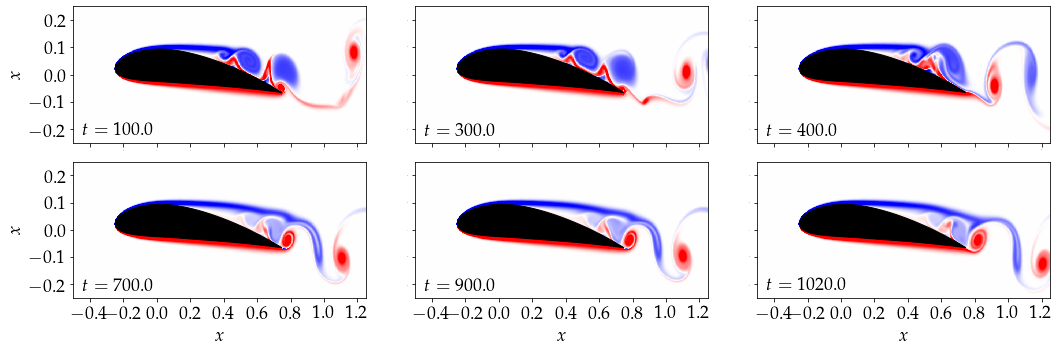

In [48]:
figure(figsize = (15,5))

wing_boundary_x, wing_boundary_y = get_wing_boundary(n_points=200)
nx = 800
ny = 400

x = np.linspace(-0.5,1.25,nx)
y = np.linspace(-0.25,0.25,ny)
XX, YY = np.meshgrid(x, y)
plot_nums = [2,4,5,8,10,12]

for j in range(6):
    
    if j < 3:
        row = 0
        col = j
    else:
        row = 1
        col = j-3
    
    ax = subplot2grid((2,3),(row, col), rowspan=1,colspan=1)
    t,Cx,Cy,u,v,p,W = get_snapshot(plot_nums[j])
    u_grid = interp(W, Cx, Cy, XX, YY, method='linear').reshape(ny,nx)
    pcolor(XX,YY,u_grid, cmap='bwr', vmin=-50,vmax=50, shading='auto')
    fill(wing_boundary_x, wing_boundary_y, c='k')
    xlim([np.min(x),np.max(x)])
    ylim([np.min(y),np.max(y)])
    # ax.set_aspect('equal')
    xticks(fontsize = 0)
    yticks(fontsize = label_fs)
    text(-0.45,-0.22,r'$t='+str(np.round(t,2))+'$',fontsize = label_fs)
    
    if j < 3:
        xticks(fontsize = 0)
    else:
        xticks(fontsize = label_fs)
        xlabel(r'$x$', fontsize = label_fs)
        
    if j == 0 or j == 3:
        yticks(fontsize = label_fs)
        ylabel(r'$x$', fontsize = label_fs)
    else:
        yticks(fontsize = 0)

tight_layout()

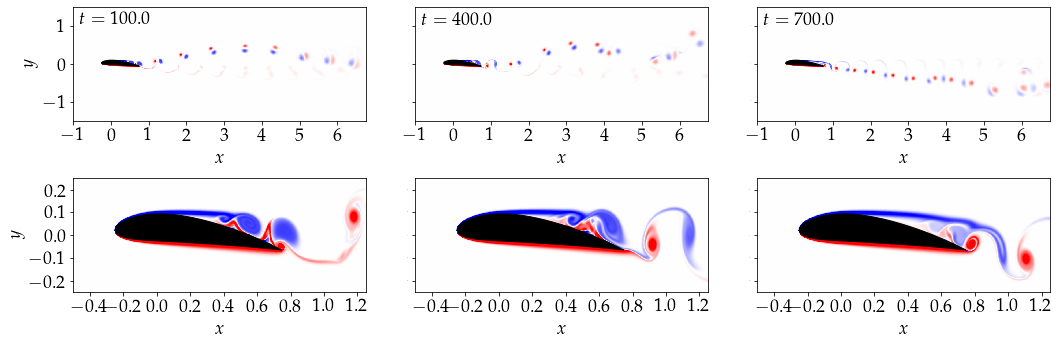

In [51]:
figure(figsize = (15,5))
plot_nums = [2,5,8]

wing_boundary_x, wing_boundary_y = get_wing_boundary(n_points=200)
nx = 800
ny = 400

x = np.linspace(-1,6.75,nx)
y = np.linspace(-1.5,1.5,ny)
XX, YY = np.meshgrid(x, y)

for j in range(3):
    
    ax = subplot2grid((2,3),(0, j), rowspan=1,colspan=1)
    t,Cx,Cy,u,v,p,W = get_snapshot(plot_nums[j])
    u_grid = interp(W, Cx, Cy, XX, YY, method='linear').reshape(ny,nx)
    pcolor(XX,YY,u_grid, cmap='bwr', vmin=-50,vmax=50, shading='auto')
    fill(wing_boundary_x, wing_boundary_y, c='k')
    xlim([np.min(x),np.max(x)])
    ylim([np.min(y),np.max(y)])
    # ax.set_aspect('equal')
    xticks(fontsize = 0)
    yticks(fontsize = label_fs)
    text(-0.85,1.05,r'$t='+str(np.round(t,2))+'$',fontsize = label_fs)
    xticks(fontsize = label_fs)
    xlabel(r'$x$', fontsize = label_fs)
    if j == 0:
        yticks(fontsize = label_fs)
        ylabel(r'$y$', fontsize = label_fs)
    else:
        yticks(fontsize = 0)
        
x = np.linspace(-0.5,1.25,nx)
y = np.linspace(-0.25,0.25,ny)
XX, YY = np.meshgrid(x, y)

for j in range(3):
    
    ax = subplot2grid((2,3),(1, j), rowspan=1,colspan=1)
    t,Cx,Cy,u,v,p,W = get_snapshot(plot_nums[j])
    u_grid = interp(W, Cx, Cy, XX, YY, method='linear').reshape(ny,nx)
    pcolor(XX,YY,u_grid, cmap='bwr', vmin=-50,vmax=50, shading='auto')
    fill(wing_boundary_x, wing_boundary_y, c='k')
    xlim([np.min(x),np.max(x)])
    ylim([np.min(y),np.max(y)])
    # ax.set_aspect('equal')
    xticks(fontsize = 0)
    yticks(fontsize = label_fs)
    xticks(fontsize = label_fs)
    xlabel(r'$x$', fontsize = label_fs)
    if j == 0:
        yticks(fontsize = label_fs)
        ylabel(r'$y$', fontsize = label_fs)
    else:
        yticks(fontsize = 0)

tight_layout()